In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import math
import seaborn as sns

warnings.filterwarnings(action='ignore') 

In [150]:
df = pd.read_csv("Fin_dataset/movie_final_data.csv")
df

,imdb_title_id,title,release_year,region,language,genres,runtime_min,is_adult,budget_dol,director_1,...,imdb_rate_2021,num_votes_2017,num_votes_2019,num_votes_2021,movie_popularity,amazon_prime,netflix,disney+,num_ott_avail,is_original_movie
0,tt0000574,The Story of the Kelly Gang,1906,AU,en,"Action,Adventure,Biography",70,0,2250.0,nm0846879,...,6.1,2.0,589.0,698.0,2.075,0.0,0.0,0.0,0.0,0.0
1,tt0001258,The White Slave Trade,1910,DK,da,Drama,45,0,0.0,nm0088881,...,5.7,0.0,0.0,132.0,0.861,0.0,0.0,0.0,0.0,0.0
2,tt0001892,Den sorte drøm,1911,DK,da,Drama,53,0,0.0,nm0300487,...,5.9,1.0,188.0,214.0,1.646,0.0,0.0,0.0,0.0,0.0
3,tt0002101,Cleopatra,1912,US,en,"Drama,History",100,0,45000.0,nm0309130,...,5.1,1.0,446.0,520.0,2.212,0.0,0.0,0.0,0.0,0.0
4,tt0002130,Dante's Inferno,1911,IT,it,"Adventure,Drama,Fantasy",71,0,0.0,nm0655824,...,7.0,18.0,2237.0,2675.0,5.193,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108490,tt9914192,No Gogó do Paulinho,2020,BR,pt,Comedy,98,0,0.0,nm0764367,...,5.6,0.0,0.0,214.0,2.689,0.0,0.0,0.0,0.0,0.0
108491,tt9914942,Life Without Sara Amat,2019,ES,ca,Drama,74,0,0.0,nm1716653,...,6.8,0.0,102.0,134.0,3.308,0.0,0.0,0.0,0.0,0.0
108492,tt9916190,Safeguard,2020,GB,en,"Action,Adventure,Thriller",90,0,0.0,nm7308376,...,3.5,0.0,0.0,225.0,3.100,0.0,0.0,0.0,0.0,0.0
108493,tt9916270,Il talento del calabrone,2020,IT,it,Thriller,84,0,0.0,nm1480867,...,5.8,0.0,0.0,1192.0,5.830,0.0,0.0,0.0,0.0,0.0


In [152]:
df.columns

Index(['imdb_title_id', 'title', 'release_year', 'region', 'language',
       'genres', 'runtime_min', 'is_adult', 'budget_dol', 'director_1',
       'director_1_name', 'director_1_num_movies', 'director_1_average_income',
       'director_1_academy_winner', 'deriector_1_popularity_point',
       'director_2', 'director_2_name', 'director_2_num_movies',
       'director_2_average_income', 'director_2_academy_winner',
       'deriector_2_popularity_point', 'star_1', 'star_1_name',
       'star_1_academy_winner', 'star_1_popularity_point', 'star_2',
       'star_2_name', 'star_2_academy_winner', 'star_2_popularity_point',
       'star_3', 'star_3_name', 'star_3_academy_winner',
       'star_3_popularity_point', 'star_4', 'star_4_name',
       'star_4_academy_winner', 'star_4_popularity_point', 'imdb_rate_2017',
       'imdb_rate_2019', 'imdb_rate_2021', 'num_votes_2017', 'num_votes_2019',
       'num_votes_2021', 'movie_popularity', 'amazon_prime', 'netflix',
       'disney+', 'num_ott_a

## 1) Take a log for some variables

- First, we goona find some variables heavily skewd
- and then, take a log for that variables
- With this process the accuration of our linear model will be increasd

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108495 entries, 0 to 108494
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   imdb_title_id                 108495 non-null  object 
 1   title                         108495 non-null  object 
 2   release_year                  108495 non-null  object 
 3   region                        108492 non-null  object 
 4   language                      108495 non-null  object 
 5   genres                        108495 non-null  object 
 6   runtime_min                   108495 non-null  int64  
 7   is_adult                      108495 non-null  int64  
 8   budget_dol                    108495 non-null  float64
 9   director_1                    108495 non-null  object 
 10  director_1_name               108495 non-null  object 
 11  director_1_num_movies         108495 non-null  float64
 12  director_1_average_income     108495 non-nul

In [154]:
# find the numerical columns
num_feats = df.dtypes[df.dtypes != "object"].index 

print("Number of Numerical features: ", len(num_feats),"\n"
     "List of Numerical features: ", "\n",num_feats)

Number of Numerical features:  31 
List of Numerical features:  
 Index(['runtime_min', 'is_adult', 'budget_dol', 'director_1_num_movies',
       'director_1_average_income', 'director_1_academy_winner',
       'deriector_1_popularity_point', 'director_2_num_movies',
       'director_2_average_income', 'director_2_academy_winner',
       'deriector_2_popularity_point', 'star_1_academy_winner',
       'star_1_popularity_point', 'star_2_academy_winner',
       'star_2_popularity_point', 'star_3_academy_winner',
       'star_3_popularity_point', 'star_4_academy_winner',
       'star_4_popularity_point', 'imdb_rate_2017', 'imdb_rate_2019',
       'imdb_rate_2021', 'num_votes_2017', 'num_votes_2019', 'num_votes_2021',
       'movie_popularity', 'amazon_prime', 'netflix', 'disney+',
       'num_ott_avail', 'is_original_movie'],
      dtype='object')


In [155]:
# Check the Skewness, kurtosis
columns = []
skewness = []

for col in num_feats: 
    columns.append(col)
    skewness.append(df[col].skew())
          
num_cul = pd.DataFrame({"Skewness":skewness}, index = columns).sort_values(by = 'Skewness', ascending = True)

<AxesSubplot:>

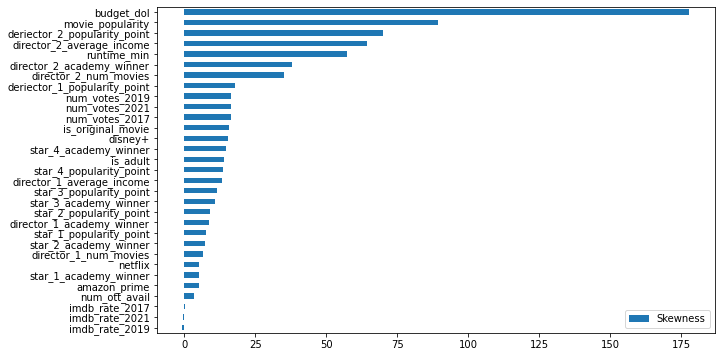

In [156]:
num_cul.plot(kind='barh', figsize=(10,6))

There is some skewness on budget_dol, movie_popularity, director_popluarity_point, director_average_income, runtime_min, num_votes, star_popularity.
So we gonna take a log of that variables.

In [157]:
log_list = ['budget_dol','movie_popularity','deriector_2_popularity_point', 'director_2_average_income', 'runtime_min',
           'deriector_1_popularity_point','director_1_average_income', 'num_votes_2019','num_votes_2021','num_votes_2017',
           'star_1_popularity_point','star_2_popularity_point','star_3_popularity_point','star_4_popularity_point']


In [158]:
for col in log_list:
    df['{}_log'.format(col)] = np.log(df[col])

In [159]:
# change -inf value(which was 0 for original value) to 0

df.replace(-np.inf, 0, inplace=True)
df

,imdb_title_id,title,release_year,region,language,genres,runtime_min,is_adult,budget_dol,director_1,...,runtime_min_log,deriector_1_popularity_point_log,director_1_average_income_log,num_votes_2019_log,num_votes_2021_log,num_votes_2017_log,star_1_popularity_point_log,star_2_popularity_point_log,star_3_popularity_point_log,star_4_popularity_point_log
0,tt0000574,The Story of the Kelly Gang,1906,AU,en,"Action,Adventure,Biography",70,0,2250.0,nm0846879,...,4.248495,0.0,0.0,6.378426,6.548219,0.693147,0.0,0.0,0.0,0.0
1,tt0001258,The White Slave Trade,1910,DK,da,Drama,45,0,0.0,nm0088881,...,3.806662,0.0,0.0,0.000000,4.882802,0.000000,0.0,0.0,0.0,0.0
2,tt0001892,Den sorte drøm,1911,DK,da,Drama,53,0,0.0,nm0300487,...,3.970292,0.0,0.0,5.236442,5.365976,0.000000,0.0,0.0,0.0,0.0
3,tt0002101,Cleopatra,1912,US,en,"Drama,History",100,0,45000.0,nm0309130,...,4.605170,0.0,0.0,6.100319,6.253829,0.000000,0.0,0.0,0.0,0.0
4,tt0002130,Dante's Inferno,1911,IT,it,"Adventure,Drama,Fantasy",71,0,0.0,nm0655824,...,4.262680,0.0,0.0,7.712891,7.891705,2.890372,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108490,tt9914192,No Gogó do Paulinho,2020,BR,pt,Comedy,98,0,0.0,nm0764367,...,4.584967,0.0,0.0,0.000000,5.365976,0.000000,0.0,0.0,0.0,0.0
108491,tt9914942,Life Without Sara Amat,2019,ES,ca,Drama,74,0,0.0,nm1716653,...,4.304065,0.0,0.0,4.624973,4.897840,0.000000,0.0,0.0,0.0,0.0
108492,tt9916190,Safeguard,2020,GB,en,"Action,Adventure,Thriller",90,0,0.0,nm7308376,...,4.499810,0.0,0.0,0.000000,5.416100,0.000000,0.0,0.0,0.0,0.0
108493,tt9916270,Il talento del calabrone,2020,IT,it,Thriller,84,0,0.0,nm1480867,...,4.430817,0.0,0.0,0.000000,7.083388,0.000000,0.0,0.0,0.0,0.0


## 2) Make a dummy value for categorical data

- Make a dummy columns for genre, country and language which is the categorical data.
- if gerne is action, romance the value will be assigned 1 to genre_action and genre_romance
- Since there are more then hundreds category for language, and country, we will use the data sum of top 5 for each category

In [160]:
# Manipluation for country and language

# split country colum but just get the primary country(first order) for this colum
region_1 = df['region'].str.split(',').str[0]
top_reg = region_1.value_counts()[0:5].index.to_list() # top 5 country, since there are a lot of "unknonw" silcing to 0~6
region_1[~region_1.isin(top_reg)] = 'others' # Make other to others

# split language colum but just get the primary language(first order) for this colum
language_1 = df['language'].str.split(',').str[0]
top_lan = language_1.value_counts()[0:4].index.to_list() # top 10 language
language_1[~language_1.isin(top_lan)] = 'others' # Make other to others

# concat country+language
cont_lan = pd.concat([region_1,language_1],axis=1, keys=['region_dum','language_dum'])
cont_lan['region_dum'] = cont_lan['region_dum'].str.replace("Unknown",'others')
cont_lan

,region_dum,language_dum
0,others,en
1,others,others
2,others,others
3,US,en
4,others,it
...,...,...
108490,others,others
108491,others,others
108492,GB,en
108493,others,it


In [161]:
# split genre column
genre = df['genres'].str.split(',', expand=True)
genre.columns = ['genre_dum_1','genre_dum_2','genre_dum_3']

# concat cat value
cat = pd.concat([genre,cont_lan],axis=1)

# simply concat the genre data to original dataset
df_cat = pd.concat([df, cat], axis=1)

# Get dummy values

df_cat = pd.get_dummies(df_cat,columns=['genre_dum_1','genre_dum_2','genre_dum_3','region_dum','language_dum'])
df_cat

,imdb_title_id,title,release_year,region,language,genres,runtime_min,is_adult,budget_dol,director_1,...,region_dum_FR,region_dum_GB,region_dum_IN,region_dum_US,region_dum_others,language_dum_en,language_dum_es,language_dum_fr,language_dum_it,language_dum_others
0,tt0000574,The Story of the Kelly Gang,1906,AU,en,"Action,Adventure,Biography",70,0,2250.0,nm0846879,...,0,0,0,0,1,1,0,0,0,0
1,tt0001258,The White Slave Trade,1910,DK,da,Drama,45,0,0.0,nm0088881,...,0,0,0,0,1,0,0,0,0,1
2,tt0001892,Den sorte drøm,1911,DK,da,Drama,53,0,0.0,nm0300487,...,0,0,0,0,1,0,0,0,0,1
3,tt0002101,Cleopatra,1912,US,en,"Drama,History",100,0,45000.0,nm0309130,...,0,0,0,1,0,1,0,0,0,0
4,tt0002130,Dante's Inferno,1911,IT,it,"Adventure,Drama,Fantasy",71,0,0.0,nm0655824,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108490,tt9914192,No Gogó do Paulinho,2020,BR,pt,Comedy,98,0,0.0,nm0764367,...,0,0,0,0,1,0,0,0,0,1
108491,tt9914942,Life Without Sara Amat,2019,ES,ca,Drama,74,0,0.0,nm1716653,...,0,0,0,0,1,0,0,0,0,1
108492,tt9916190,Safeguard,2020,GB,en,"Action,Adventure,Thriller",90,0,0.0,nm7308376,...,0,1,0,0,0,1,0,0,0,0
108493,tt9916270,Il talento del calabrone,2020,IT,it,Thriller,84,0,0.0,nm1480867,...,0,0,0,0,1,0,0,0,1,0


In [162]:
# Here is the all the dummy value we get

df_cat.columns[-79:]

Index(['genre_dum_1_Action', 'genre_dum_1_Adult', 'genre_dum_1_Adventure',
       'genre_dum_1_Animation', 'genre_dum_1_Biography', 'genre_dum_1_Comedy',
       'genre_dum_1_Crime', 'genre_dum_1_Documentary', 'genre_dum_1_Drama',
       'genre_dum_1_Family', 'genre_dum_1_Fantasy', 'genre_dum_1_Film-Noir',
       'genre_dum_1_History', 'genre_dum_1_Horror', 'genre_dum_1_Music',
       'genre_dum_1_Musical', 'genre_dum_1_Mystery', 'genre_dum_1_Romance',
       'genre_dum_1_Sci-Fi', 'genre_dum_1_Sport', 'genre_dum_1_Thriller',
       'genre_dum_1_War', 'genre_dum_1_Western', 'genre_dum_2_Adult',
       'genre_dum_2_Adventure', 'genre_dum_2_Animation',
       'genre_dum_2_Biography', 'genre_dum_2_Comedy', 'genre_dum_2_Crime',
       'genre_dum_2_Documentary', 'genre_dum_2_Drama', 'genre_dum_2_Family',
       'genre_dum_2_Fantasy', 'genre_dum_2_Film-Noir', 'genre_dum_2_History',
       'genre_dum_2_Horror', 'genre_dum_2_Music', 'genre_dum_2_Musical',
       'genre_dum_2_Mystery', 'genre_dum

In [163]:
# Choose only columns for analysis
df_ana = df_cat[['title', 
        'imdb_rate_2017','imdb_rate_2019','imdb_rate_2021', 'movie_popularity_log', # dependent variable
        'release_year', 'runtime_min_log','is_adult', 'budget_dol_log','is_original_movie', # movie's basic information
        'region_dum_FR', 'region_dum_GB', 'region_dum_IN', 'region_dum_US', 'region_dum_others', #dummy of region
        'language_dum_en', 'language_dum_es', 'language_dum_fr','language_dum_it', 'language_dum_others', #dummy of len
        'genre_dum_1_Action', 'genre_dum_1_Adult', 'genre_dum_1_Adventure',
        'genre_dum_1_Animation', 'genre_dum_1_Biography', 'genre_dum_1_Comedy',
        'genre_dum_1_Crime', 'genre_dum_1_Documentary', 'genre_dum_1_Drama',
        'genre_dum_1_Family', 'genre_dum_1_Fantasy', 'genre_dum_1_Film-Noir',
        'genre_dum_1_History', 'genre_dum_1_Horror', 'genre_dum_1_Music',
        'genre_dum_1_Musical', 'genre_dum_1_Mystery', 'genre_dum_1_Romance',
        'genre_dum_1_Sci-Fi', 'genre_dum_1_Sport', 'genre_dum_1_Thriller',
        'genre_dum_1_War', 'genre_dum_1_Western', 'genre_dum_2_Adult',
        'genre_dum_2_Adventure', 'genre_dum_2_Animation',
        'genre_dum_2_Biography', 'genre_dum_2_Comedy', 'genre_dum_2_Crime',
        'genre_dum_2_Documentary', 'genre_dum_2_Drama', 'genre_dum_2_Family',
        'genre_dum_2_Fantasy', 'genre_dum_2_Film-Noir', 'genre_dum_2_History',
        'genre_dum_2_Horror', 'genre_dum_2_Music', 'genre_dum_2_Musical',
        'genre_dum_2_Mystery', 'genre_dum_2_News', 'genre_dum_2_Reality-TV',
        'genre_dum_2_Romance', 'genre_dum_2_Sci-Fi', 'genre_dum_2_Sport',
        'genre_dum_2_Thriller', 'genre_dum_2_War', 'genre_dum_2_Western',
        'genre_dum_3_Animation', 'genre_dum_3_Biography', 'genre_dum_3_Comedy',
        'genre_dum_3_Crime', 'genre_dum_3_Documentary', 'genre_dum_3_Drama',
        'genre_dum_3_Family', 'genre_dum_3_Fantasy', 'genre_dum_3_Film-Noir',
        'genre_dum_3_History', 'genre_dum_3_Horror', 'genre_dum_3_Music',
        'genre_dum_3_Musical', 'genre_dum_3_Mystery', 'genre_dum_3_News',
        'genre_dum_3_Reality-TV', 'genre_dum_3_Romance', 'genre_dum_3_Sci-Fi',
        'genre_dum_3_Sport', 'genre_dum_3_Thriller', 'genre_dum_3_War', 'genre_dum_3_Western', #dummy for genres
        'director_1_num_movies', 'director_1_average_income_log',
        'director_1_academy_winner', 'deriector_1_popularity_point_log',
        'director_2_num_movies', 'director_2_average_income_log', 
        'director_2_academy_winner', 'deriector_2_popularity_point_log',  # Director power
        'star_1_academy_winner', 'star_1_popularity_point_log',
        'star_2_academy_winner', 'star_2_popularity_point_log',
        'star_3_academy_winner','star_3_popularity_point_log', 
        'star_4_academy_winner', 'star_4_popularity_point_log', # Star power
        'num_votes_2017_log', 'num_votes_2019_log', 'num_votes_2021_log',
        'amazon_prime', 'netflix', 'disney+', 'num_ott_avail']] # Avialability of OTT
df_ana

,title,imdb_rate_2017,imdb_rate_2019,imdb_rate_2021,movie_popularity_log,release_year,runtime_min_log,is_adult,budget_dol_log,is_original_movie,...,star_3_popularity_point_log,star_4_academy_winner,star_4_popularity_point_log,num_votes_2017_log,num_votes_2019_log,num_votes_2021_log,amazon_prime,netflix,disney+,num_ott_avail
0,The Story of the Kelly Gang,5.5,6.1,6.1,0.729961,1906,4.248495,0,7.718685,0.0,...,0.0,0.0,0.0,0.693147,6.378426,6.548219,0.0,0.0,0.0,0.0
1,The White Slave Trade,0.0,0.0,5.7,-0.149661,1910,3.806662,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,4.882802,0.0,0.0,0.0,0.0
2,Den sorte drøm,4.0,5.8,5.9,0.498348,1911,3.970292,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,5.236442,5.365976,0.0,0.0,0.0,0.0
3,Cleopatra,4.0,5.2,5.1,0.793897,1912,4.605170,0,10.714418,0.0,...,0.0,0.0,0.0,0.000000,6.100319,6.253829,0.0,0.0,0.0,0.0
4,Dante's Inferno,5.9,7.0,7.0,1.647312,1911,4.262680,0,0.000000,0.0,...,0.0,0.0,0.0,2.890372,7.712891,7.891705,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108490,No Gogó do Paulinho,0.0,0.0,5.6,0.989169,2020,4.584967,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,5.365976,0.0,0.0,0.0,0.0
108491,Life Without Sara Amat,0.0,6.7,6.8,1.196344,2019,4.304065,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,4.624973,4.897840,0.0,0.0,0.0,0.0
108492,Safeguard,0.0,0.0,3.5,1.131402,2020,4.499810,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,5.416100,0.0,0.0,0.0,0.0
108493,Il talento del calabrone,0.0,0.0,5.8,1.763017,2020,4.430817,0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,7.083388,0.0,0.0,0.0,0.0


In [212]:
df_ana['release_year']

0         1906
1         1910
2         1911
3         1912
4         1911
          ... 
108490    2020
108491    2019
108492    2020
108493    2020
108494    2020
Name: release_year, Length: 108492, dtype: int32

In [203]:
df_ana.to_csv("movie_final_data_for_analysis.csv",index=False, encoding='utf-8')
df_ana.to_excel("movie_final_data_for_analysis.xlsx",index=False, encoding='utf-8')

### Data pro-processing

After finished doing data manipulation, we found that there are some problems related to the missing values.<br>
Therefore we did some processing with some variables.

1) Bduget: We have more than 80,000 missing values from budget columns which is about 80% of whole data, we decided to delete this variable. <br>
However, since budget is one of the most important factor for moive, we make the other dataset which the data of budget is available

2) Power of Directors and Stars: Some movies have 2 to 4 driectors and stars, on the other hand some of the movies have only sinlg director or 1~2 stars. It makes unaccraute result when we do MLP analysis.<br>
--->
* Count total number of movies of directors
* Count the total number of academy winner for directors and stars
* Count the total popularity point for directors and stars

3) Avergae income of Directors: Delete this columns as well since there are a lot of missing values.


In [36]:
df = pd.read_csv("Fin_dataset/movie_final_data_for_analysis.csv", encoding='utf-8')

In [38]:
df['dircetor_total_num_movies'] = df.director_1_num_movies + df.director_2_num_movies
df['director_num_academy_winner'] = df.director_1_academy_winner + df.director_2_academy_winner
df['director_total_popluarity'] = df.deriector_1_popularity_point_log + df.deriector_2_popularity_point_log
df.drop(columns = ['director_1_average_income_log', 'director_2_average_income_log',
                'director_1_academy_winner', 'director_2_academy_winner',
                'director_1_num_movies', 'director_2_num_movies',
                'deriector_1_popularity_point_log','deriector_2_popularity_point_log'], axis=0, inplace=True)


df['stars_num_academy_winner'] =  df.star_1_academy_winner + df.star_2_academy_winner + df.star_3_academy_winner + df.star_4_academy_winner
df['stars_popularity_point_log'] = df.star_1_popularity_point_log + df.star_2_popularity_point_log  + df.star_3_popularity_point_log  + df.star_4_popularity_point_log 
df.drop(columns = ['star_1_academy_winner','star_2_academy_winner','star_3_academy_winner','star_4_academy_winner',
                  'star_1_popularity_point_log','star_2_popularity_point_log','star_3_popularity_point_log','star_4_popularity_point_log'], inplace = True)

In [43]:
## Seprate the dataset which have data of budget

df_with_dol = df[df.budget_dol_log != 0]
df_with_dol.to_csv("movie_final_data_for_analysis_with_dol.csv", index=False, encoding='utf-8')
df_with_dol.to_excel("movie_final_data_for_analysis_with_dol.xlsx", index=False, encoding='utf-8')

In [40]:
## Drop the dollar column for original datatset

df.drop(columns='budget_dol_log', inplace=True)

In [42]:
df.to_csv("movie_final_data_for_analysis_v2.csv", index=False, encoding='utf-8')
df.to_excel("movie_final_data_for_analysis_v2.xlsx", index=False, encoding='utf-8')